# Xử lý dữ liệu chứng khoán

## Đọc dữ liệu đầu vào

In [1]:
# Đọc các file nhỏ đã xử lý rồi tiến hành phân tích dữ liệu
import glob
import os
import pandas as pd
folder = 'data_clean'

df_all = {}
for path in glob.glob(os.path.join(folder, '*.csv')):
    print(path)
    file_name = os.path.basename(path)
    df_all[file_name.split('.')[0]] = pd.read_csv(path)

data_clean\BVH.csv
data_clean\CTG.csv
data_clean\DPM.csv
data_clean\DPR.csv
data_clean\DXG.csv
data_clean\EIB.csv
data_clean\FPT.csv
data_clean\GAS.csv
data_clean\GMD.csv
data_clean\HPG.csv
data_clean\MBB.csv
data_clean\MSN.csv
data_clean\NKG.csv
data_clean\PNJ.csv
data_clean\PTB.csv
data_clean\STB.csv
data_clean\VCB.csv
data_clean\VIC.csv
data_clean\VNINDEX.csv
data_clean\VNM.csv


In [2]:
for key in df_all:
    print(df_all[key])
    break

      <DTYYYYMMDD>   <Open>     <High>      <Low>  <Close>   <Volume>
0       20120521.0  45.6568  45.656900  44.433900  45.6569   996590.0
1       20120522.0  46.4721  46.879800  44.433900  44.8416   209070.0
2       20120523.0  44.8415  44.841500  43.210900  43.2110   108330.0
3       20120524.0  43.2109  43.618600  41.172700  41.5804   371190.0
4       20120525.0  42.8033  43.618600  42.395600  43.6186   210970.0
...            ...      ...        ...        ...      ...        ...
2491    20220516.0  52.0000  53.704381  50.579618  47.9000  1700500.0
2492    20220517.0  47.0000  48.509564  47.000000  51.2000  1824800.0
2493    20220518.0  51.9000  52.500000  50.500000  50.7000  1289600.0
2494    20220519.0  49.2000  50.900000  49.150000  50.1000  1582900.0
2495    20220520.0  50.0000  51.500000  49.850000  50.2000  1463400.0

[2496 rows x 6 columns]


In [3]:
import numpy as np
# Trong bộ dữ liệu này, ta tập trung phân tích dữ liệu Close
close_all = pd.DataFrame()
for gauge in df_all:
    close_all[gauge] = df_all[gauge]['<Close>'].replace("**", -999).astype(float)

In [4]:
close_all

,BVH,CTG,DPM,DPR,DXG,EIB,FPT,GAS,GMD,HPG,MBB,MSN,NKG,PNJ,PTB,STB,VCB,VIC,VNINDEX,VNM
0,45.6569,12.4018,13.5002,18.3937,3.3882,15.6319,10.5722,24.8349,10.0454,1.8272,4.9108,53.4079,4.0648,10.0215,2.7723,15.6833,13.8005,16.7846,448.02,16.4147
1,44.8416,12.0636,13.6186,18.3937,3.2863,15.7183,10.4257,26.0463,10.0052,1.8272,4.8125,51.8523,3.8800,10.0697,2.7129,15.8088,13.4639,17.1170,447.94,16.2302
2,43.2110,11.7253,13.3028,18.2116,3.1334,15.7183,10.2163,24.7743,9.7239,1.8198,4.6816,51.8523,3.6952,10.0938,2.6337,15.6833,12.7907,16.9508,436.75,16.1380
3,41.5804,11.3871,13.2239,17.4831,2.9806,15.4592,10.1745,23.5628,9.7641,1.7828,4.6161,51.8523,3.8800,9.9975,2.6337,15.6206,12.2858,16.7846,426.92,15.9536
4,43.6186,11.9508,13.8554,17.7016,3.1079,15.6319,10.3838,23.6234,10.2463,1.8494,4.8453,51.8523,4.0648,10.0215,2.7129,15.9970,12.8749,16.9508,437.38,16.1380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2491,47.9000,24.5500,46.0500,68.5000,25.0000,31.1000,93.2000,95.0000,48.4000,36.3000,24.6000,90.2000,25.7000,98.0000,96.0000,19.0500,74.2000,77.0000,1171.95,65.8000
2492,51.2000,26.2500,49.2500,73.2000,26.2000,31.5000,99.7000,100.9000,51.7000,38.2000,26.3000,96.5000,27.4500,103.1000,98.0000,20.3500,76.0000,78.0000,1228.37,70.0000
2493,50.7000,26.6000,52.4000,74.7000,26.7000,31.5000,97.7000,105.0000,51.2000,38.2000,26.6500,103.2000,29.0000,102.1000,97.0000,21.7500,75.4000,78.0000,1240.76,70.3000
2494,50.1000,26.1000,53.5000,76.3000,25.5000,30.4000,97.0000,105.8000,51.0000,37.9000,26.7500,110.4000,28.7000,102.1000,98.0000,21.7500,76.0000,77.9000,1241.64,69.0000





## Làm sạch dữ liệu

### Thống kê dữ liệu

In [5]:
# Đếm số giá trị không phải số
print(close_all)
print(close_all.isna().sum())
# Đếm số giá trị nhỏ hơn 0 (ta coi đây là NaN)
print(close_all.lt(0).sum())
print(close_all.describe())

          BVH      CTG      DPM      DPR      DXG      EIB      FPT       GAS  \
0     45.6569  12.4018  13.5002  18.3937   3.3882  15.6319  10.5722   24.8349   
1     44.8416  12.0636  13.6186  18.3937   3.2863  15.7183  10.4257   26.0463   
2     43.2110  11.7253  13.3028  18.2116   3.1334  15.7183  10.2163   24.7743   
3     41.5804  11.3871  13.2239  17.4831   2.9806  15.4592  10.1745   23.5628   
4     43.6186  11.9508  13.8554  17.7016   3.1079  15.6319  10.3838   23.6234   
...       ...      ...      ...      ...      ...      ...      ...       ...   
2491  47.9000  24.5500  46.0500  68.5000  25.0000  31.1000  93.2000   95.0000   
2492  51.2000  26.2500  49.2500  73.2000  26.2000  31.5000  99.7000  100.9000   
2493  50.7000  26.6000  52.4000  74.7000  26.7000  31.5000  97.7000  105.0000   
2494  50.1000  26.1000  53.5000  76.3000  25.5000  30.4000  97.0000  105.8000   
2495  50.2000  25.9000  55.5000  76.2000  26.9500  30.9000  97.5000  104.5000   

          GMD      HPG     

### Vẽ một vài đồ thị đơn giản để xem độ sạch dữ liệu

C:\Users\ADMIN\AppData\Local\Temp/ipykernel_14132/1472277305.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


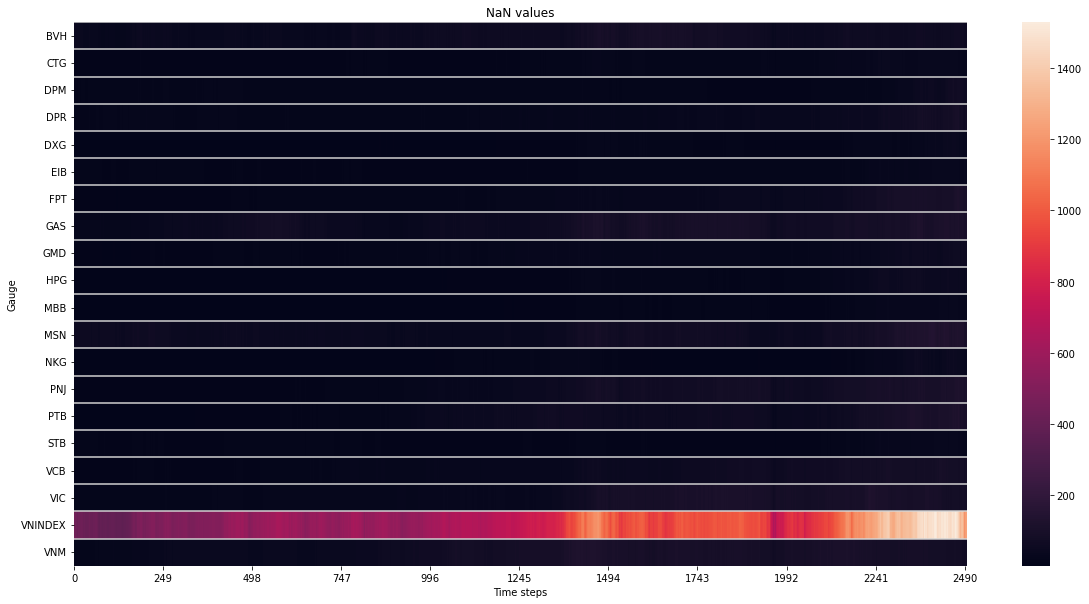

In [6]:
import seaborn
import matplotlib.pyplot as plt

def barcode_plot_for_timeseries(dataframe, title, x_label, y_label, fig_size_inches=(20,10), xticks_density=10):
    
    """ 
    
    - dataframe: dataframe of multiple timeseries(transposed)
    
        Shape of df:
         _______________________________________________________
        |   | Timestep1 | Timestep2 | Timestep3 | ... | Timestepn |
        |___|___________|___________|___________|_____|___________|
        |TS1|    ...    |    ...    |    ...    | ... |   ....    |
        |TS2|    ...    |    ...    |    ...    | ... |   ....    |
        |TS3|    ...    |    ...    |    ...    | ... |   ....    |
        |___|___________|___________|___________|_____|___________| 
    
    - title   : Title of the plot
    - x_label : x label of the plot
    - y_label : y label of the plot
    - fig_size_inches : tuple of figsize, in inches
    - xticks_density  : numbers of ticks on x axis (preferably divisible by time length)

    """
    
    # set up plot
    fig, ax = plt.subplots()
    fig.set_size_inches(fig_size_inches[0], fig_size_inches[1])

    # actual plot
    seaborn.heatmap(dataframe, yticklabels=([stock for stock in close_all]), xticklabels=int(dataframe.shape[1]/xticks_density), ax=ax)
    # cosmestic

    ax.hlines(list(range(0,dataframe.shape[0])),0, dataframe.shape[1], colors='lightgrey')
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

    fig.show()

barcode_plot_for_timeseries(close_all.to_numpy().transpose(), "NaN values", "Time steps", "Gauge")

### Xử lý dữ liệu thiếu hoặc NaN một lần nữa

  - Nếu số lượng NaN liên tục quá nhiều, ta có thể xem xét bỏ luôn bộ dữ liệu đó đi hoặc lược bỏ đoạn dữ liệu từ chỗ thiếu đổ về trước hoặc đổ về sau.
  - Sử dụng một vài phương pháp học máy đơn giản hoặc hồi quy tuyến tính để dự đoán các giá trị thiếu, sau khi đã cho các mô hình này huấn luyện với dữ liệu đầy đủ.
  - Thay thế bằng các giá trị ngẫu nhiên nằm trong khoảng nào đó.
  - Thay thế bằng quy tắc tự định nghĩa.

In [17]:
close_all

,BVH,CTG,DPM,DPR,DXG,EIB,FPT,GAS,GMD,HPG,MBB,MSN,NKG,PNJ,PTB,STB,VCB,VIC,VNINDEX,VNM
0,45.6569,12.4018,13.5002,18.3937,3.3882,15.6319,10.5722,24.8349,10.0454,1.8272,4.9108,53.4079,4.0648,10.0215,2.7723,15.6833,13.8005,16.7846,448.02,16.4147
1,44.8416,12.0636,13.6186,18.3937,3.2863,15.7183,10.4257,26.0463,10.0052,1.8272,4.8125,51.8523,3.8800,10.0697,2.7129,15.8088,13.4639,17.1170,447.94,16.2302
2,43.2110,11.7253,13.3028,18.2116,3.1334,15.7183,10.2163,24.7743,9.7239,1.8198,4.6816,51.8523,3.6952,10.0938,2.6337,15.6833,12.7907,16.9508,436.75,16.1380
3,41.5804,11.3871,13.2239,17.4831,2.9806,15.4592,10.1745,23.5628,9.7641,1.7828,4.6161,51.8523,3.8800,9.9975,2.6337,15.6206,12.2858,16.7846,426.92,15.9536
4,43.6186,11.9508,13.8554,17.7016,3.1079,15.6319,10.3838,23.6234,10.2463,1.8494,4.8453,51.8523,4.0648,10.0215,2.7129,15.9970,12.8749,16.9508,437.38,16.1380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2491,47.9000,24.5500,46.0500,68.5000,25.0000,31.1000,93.2000,95.0000,48.4000,36.3000,24.6000,90.2000,25.7000,98.0000,96.0000,19.0500,74.2000,77.0000,1171.95,65.8000
2492,51.2000,26.2500,49.2500,73.2000,26.2000,31.5000,99.7000,100.9000,51.7000,38.2000,26.3000,96.5000,27.4500,103.1000,98.0000,20.3500,76.0000,78.0000,1228.37,70.0000
2493,50.7000,26.6000,52.4000,74.7000,26.7000,31.5000,97.7000,105.0000,51.2000,38.2000,26.6500,103.2000,29.0000,102.1000,97.0000,21.7500,75.4000,78.0000,1240.76,70.3000
2494,50.1000,26.1000,53.5000,76.3000,25.5000,30.4000,97.0000,105.8000,51.0000,37.9000,26.7500,110.4000,28.7000,102.1000,98.0000,21.7500,76.0000,77.9000,1241.64,69.0000


In [7]:
import numpy as np
close_all_filled = close_all
# Thay thế giá trị nhỏ hơn 0 bằng nan rồi thay bằng giá trị mean
close_all_filled[close_all_filled < 0] = np.nan
# Thay thế NaN bằng mean
close_all_filled = close_all_filled.fillna(close_all_filled.mean())

(0.0, 5000.0)

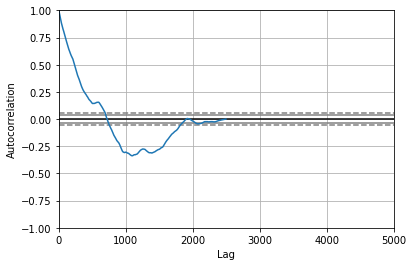

In [8]:
close_all_filled['datetime'] = pd.to_datetime(close_all_filled.index, unit='D')
close_all_filled = close_all_filled.resample('1d', on='datetime').mean().dropna(how='all')
pd.plotting.autocorrelation_plot(close_all_filled.iloc[:, 0]).set_xlim([0, 5000])

In [9]:
close_all_filled

,BVH,CTG,DPM,DPR,DXG,EIB,FPT,GAS,GMD,HPG,MBB,MSN,NKG,PNJ,PTB,STB,VCB,VIC,VNINDEX,VNM
datetime,,,,,,,,,,,,,,,,,,,,
1970-01-01,45.6569,12.4018,13.5002,18.3937,3.3882,15.6319,10.5722,24.8349,10.0454,1.8272,4.9108,53.4079,4.0648,10.0215,2.7723,15.6833,13.8005,16.7846,448.02,16.4147
1970-01-02,44.8416,12.0636,13.6186,18.3937,3.2863,15.7183,10.4257,26.0463,10.0052,1.8272,4.8125,51.8523,3.8800,10.0697,2.7129,15.8088,13.4639,17.1170,447.94,16.2302
1970-01-03,43.2110,11.7253,13.3028,18.2116,3.1334,15.7183,10.2163,24.7743,9.7239,1.8198,4.6816,51.8523,3.6952,10.0938,2.6337,15.6833,12.7907,16.9508,436.75,16.1380
1970-01-04,41.5804,11.3871,13.2239,17.4831,2.9806,15.4592,10.1745,23.5628,9.7641,1.7828,4.6161,51.8523,3.8800,9.9975,2.6337,15.6206,12.2858,16.7846,426.92,15.9536
1970-01-05,43.6186,11.9508,13.8554,17.7016,3.1079,15.6319,10.3838,23.6234,10.2463,1.8494,4.8453,51.8523,4.0648,10.0215,2.7129,15.9970,12.8749,16.9508,437.38,16.1380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1976-10-27,47.9000,24.5500,46.0500,68.5000,25.0000,31.1000,93.2000,95.0000,48.4000,36.3000,24.6000,90.2000,25.7000,98.0000,96.0000,19.0500,74.2000,77.0000,1171.95,65.8000
1976-10-28,51.2000,26.2500,49.2500,73.2000,26.2000,31.5000,99.7000,100.9000,51.7000,38.2000,26.3000,96.5000,27.4500,103.1000,98.0000,20.3500,76.0000,78.0000,1228.37,70.0000
1976-10-29,50.7000,26.6000,52.4000,74.7000,26.7000,31.5000,97.7000,105.0000,51.2000,38.2000,26.6500,103.2000,29.0000,102.1000,97.0000,21.7500,75.4000,78.0000,1240.76,70.3000


### Tìm và xử lý outliers
Outliers là các điểm dữ liệu mà chúng nằm khá "xa" so với hầu hết các điểm dữ liệu còn lại.

1. Một vài phương pháp tìm outliers:
- Thống kê
- Vẽ đồ thị và phát hiện trực quan

2. Xử lý outliers: Xử lý tương tự đối với với giá trị thiếu và NaN đã nêu ở trên.

In [10]:
# Phát hiện outliers bằng phương pháp thống kê interquartile range
q1 = close_all_filled.quantile(0.25)
q3  = close_all_filled.quantile(0.75)
iqr = q3 - q1
# 
close_all_filled_filtered = close_all_filled[(close_all_filled > (q1 - 1.5*iqr)) & (close_all_filled < (q3 + 1.5*iqr))]

<AxesSubplot:>

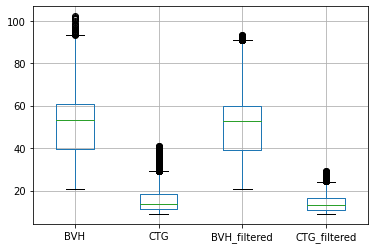

In [11]:
# Phát hiện outliers bằng phương pháp vẽ đồ thị (boxplot)
# Những điểm nằm ngoài hai cái râu đều là các giá trị outliers.
# Số lượng outliers nhiều như thế này có thể coi là đặc điểm của bộ dữ liệu. Ta chỉ cần xử lý vài điểm nằm ngoài hẳn như các giá trị >= 80
close_all_filled.iloc[:, :2].join(close_all_filled_filtered.iloc[:, :2], rsuffix='_filtered').boxplot()

## Thống kê lại dữ liệu sau khi đã làm sạch

In [12]:
print(close_all_filled.isna().sum())
print(close_all_filled.lt(0).sum())
print(close_all_filled.describe())

BVH        0
CTG        0
DPM        0
DPR        0
DXG        0
EIB        0
FPT        0
GAS        0
GMD        0
HPG        0
MBB        0
MSN        0
NKG        0
PNJ        0
PTB        0
STB        0
VCB        0
VIC        0
VNINDEX    0
VNM        0
dtype: int64
BVH        0
CTG        0
DPM        0
DPR        0
DXG        0
EIB        0
FPT        0
GAS        0
GMD        0
HPG        0
MBB        0
MSN        0
NKG        0
PNJ        0
PTB        0
STB        0
VCB        0
VIC        0
VNINDEX    0
VNM        0
dtype: int64
               BVH          CTG          DPM          DPR          DXG  \
count  2496.000000  2496.000000  2496.000000  2496.000000  2496.000000   
mean     53.313114    16.463501    18.729902    29.145529    11.075666   
std      17.393336     7.303455     9.619696    16.295700     8.276098   
min      20.849600     9.002500     9.265400    14.017400     1.783200   
25%      39.468225    11.330700    14.960475    18.562000     5.168800   
50%      5

## Exploratory Data Analysis

### Xác định tính trend, seasonality, cyclic
- Trend: Xu hướng tăng, giảm hay đi ngang của dữ liệu
- Seasonality: Tính chu kì của dữ liệu. Dữ liệu có xu hướng có pattern sau một khoảng thời gian nhất định.
- Cyclic: Biểu hiện sự dao động không có tính chu kì.




<AxesSubplot:xlabel='datetime'>

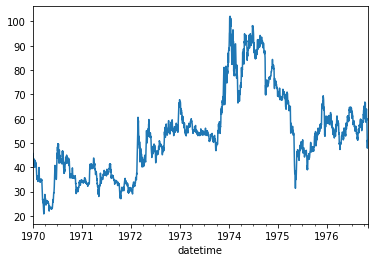

In [13]:
close_all_filled.iloc[0:2496, 0].plot()

<AxesSubplot:xlabel='datetime'>

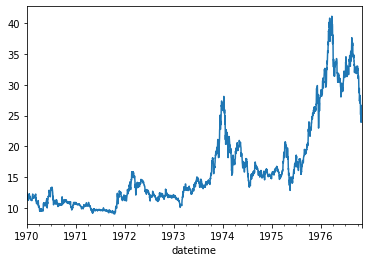

In [14]:
close_all_filled.iloc[0:2496, 1].plot()

<AxesSubplot:xlabel='datetime'>

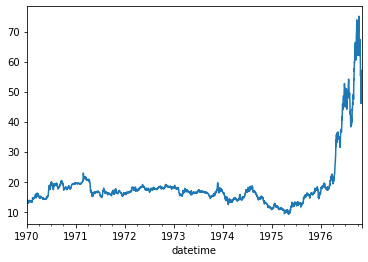

In [15]:
close_all_filled.iloc[0:2496, 2].plot()

<AxesSubplot:xlabel='datetime'>

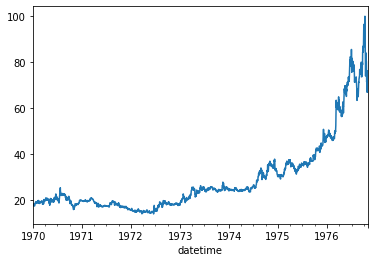

In [16]:
close_all_filled.iloc[0:2496, 3].plot()

### Xác định tính stationary and non stationary

Stationary time series có giá trị trung bình và phương sai không bị thay đổi theo thời gian (không phụ thuộc vào biến thời gian).

Stationary time series rất dễ để dự đoán!

Để xác định time series có tính stationary hay không ta có một số phương pháp:
- Chia time series thành 2 hay nhiều khoảng, tính trung bình và phương sai trên các khoảng dữ liệu này. Nếu có sự sai lệch rất ít hoặc không sai lệch thì dữ liệu có tính stationary.
- Dùng các phương pháp thống kê như Augmented Dickey-Fuller Test:
  - Null Hypothesis: Time series có tính non stationary.
  - Alternate Hypothesis: Time Series có tính stationary.
  - ADF Statistic < critical values: Chấp thuận null hypothesis. Time series có tính non stationary.
  - ADF or t Statistic > critical values: Từ chối null hypothesis. Giả thiết thay thế là đúng: Time series có tính stationary.


4.5264423076923075
23.303685897435898
5.358275163338264
196.1329351321088
ADF Statistic: -0.765892
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Accept Ho - Time Series is Non-Stationary


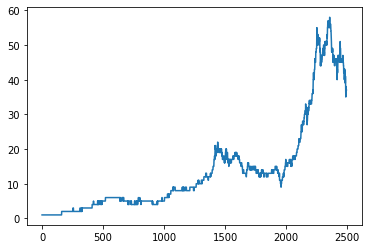

In [17]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
one_gauge_data = df_all["HPG"]
one_gauge_data = one_gauge_data.drop(columns=['<DTYYYYMMDD>'])
one_gauge_data = one_gauge_data.replace("**", -999).astype(int)
one_gauge_data[one_gauge_data < 0] = np.nan
one_gauge_data = one_gauge_data.fillna(one_gauge_data.mean())
# Thay thế giá trị nhỏ hơn 0 bằng mean
one_gauge_data['<Close>'].plot()
one_gauge_close = one_gauge_data['<Close>'].to_numpy()

data1 = one_gauge_close[0:int(len(one_gauge_data)/2)]
data2 = one_gauge_close[int(len(one_gauge_data)/2):]

print(data1.mean())
print(data2.mean())
print(data1.var())
print(data2.var())
results = adfuller(one_gauge_close)
print('ADF Statistic: %f' % results[0])
print('Critical Values:')
for key, value in results[4].items():
    print('\t%s: %.3f' % (key, value))
if results[0] > results[4]["5%"]:
    print ("Accept Ho - Time Series is Non-Stationary")
else:
    print ("Reject Ho - Time Series is Stationary")

### Xem xét tính tương quan giữa các biến với nhau hoặc chính nó sử dụng correlation và autocorrelation

Ta xét: 
- Sự tương quan giữa các trạm với nhau
- Sự tương quan giữa các thuộc tính trong 1 cổ phiếu với nhau
- Sự tương quan của 1 thuộc tính với chính nó trong quá khứ (autocorrelation)

<AxesSubplot:>

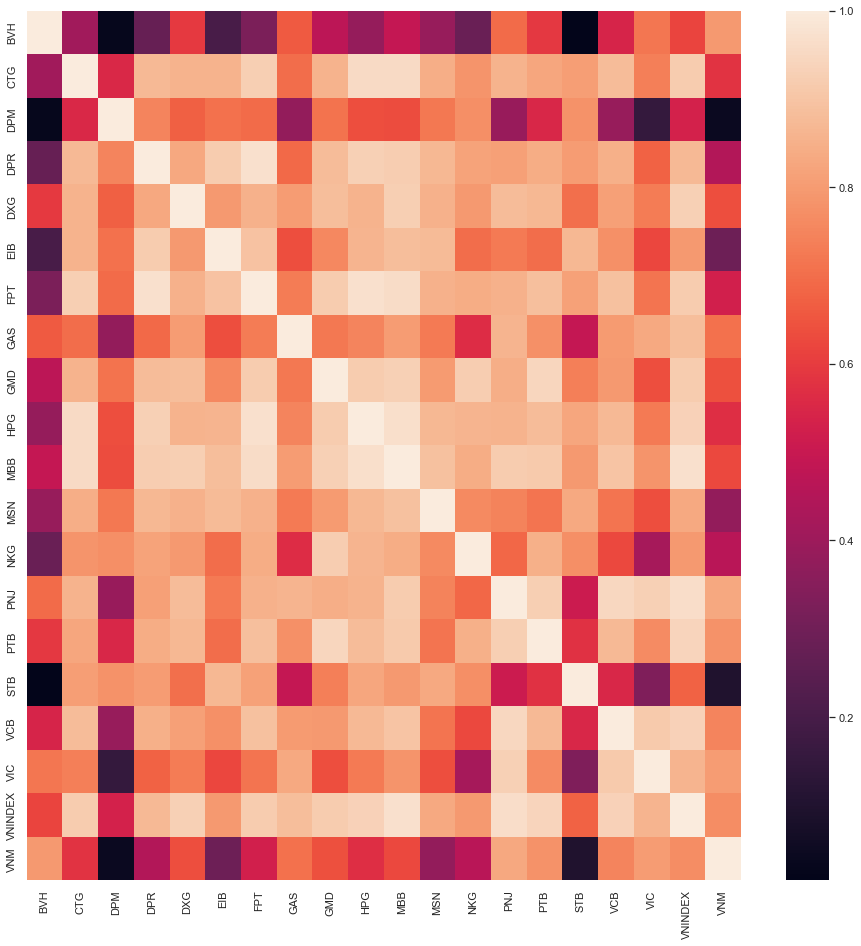

In [18]:
# Tương quan giữa các cổ phiếu
import seaborn as sns; sns.set_theme()
import matplotlib.pyplot as plt

plt.figure(figsize=(16,16))
corr_gauges = close_all_filled.corr()
sns.heatmap(corr_gauges, 
        xticklabels=corr_gauges.columns,
        yticklabels=corr_gauges.columns)

In [19]:
# chọn 2 cổ phiếu có correlation cao nhất 
tram_list = []
corr_array = np.array(corr_gauges[corr_gauges < 1].fillna(0.5))
from numpy import unravel_index
tram_list = list(unravel_index(corr_array.argmax(), corr_array.shape))
tram_list.sort()
tram_list


[6, 9]

<AxesSubplot:>

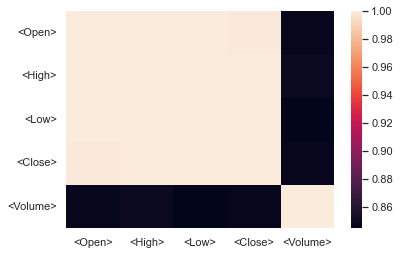

In [20]:
# Tương quan giữa các thuộc tính trong 1 trạm
import seaborn as sns; sns.set_theme()
import pandas as pd
one_gauge_data = df_all["HPG"]
one_gauge_data = one_gauge_data.drop(columns=['<DTYYYYMMDD>'])
one_gauge_data = one_gauge_data.replace("**", -999).astype(int)
one_gauge_data = one_gauge_data.fillna(one_gauge_data.mean())
# Thay thế giá trị nhỏ hơn 0 bằng mean
one_gauge_data[one_gauge_data < 0] = 0

corr_features = one_gauge_data.corr()
sns.heatmap(corr_features, 
        xticklabels=corr_features.columns,
        yticklabels=corr_features.columns)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

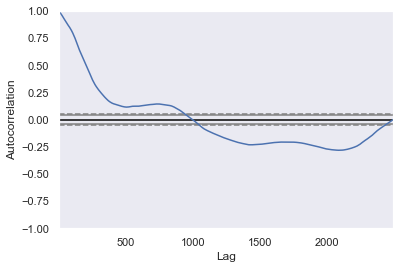

In [21]:
pd.plotting.autocorrelation_plot(one_gauge_data['<Close>'])


### Xác định tính multicollinearity

Multicolinearity xuất hiện khi có hay nhiều hơn các biến tương quan chặt chẽ với một biến khác. Điều này có thể gây rối loạn khi ta muốn giải thích xem yếu tố nào ảnh hưởng tới biến cần dự đoán. 

Ta sử dụng chỉ số VIF (Variable Inflation Factors) để đánh giá tương quan của các biến với một biến. Mặc dù correlation heatmap cũng có thể tìm được multicollinearity nhưng thường nó chỉ thể hiện mối quan hệ giữa 2 biến với nhau. Còn VIF xem xét mối tương quan của một biến với các biến còn lại.

Tham khảo: https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
  
X = one_gauge_data.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,<Open>,4186.163045
1,<High>,3842.119505
2,<Low>,4175.044501
3,<Close>,3238.355838
